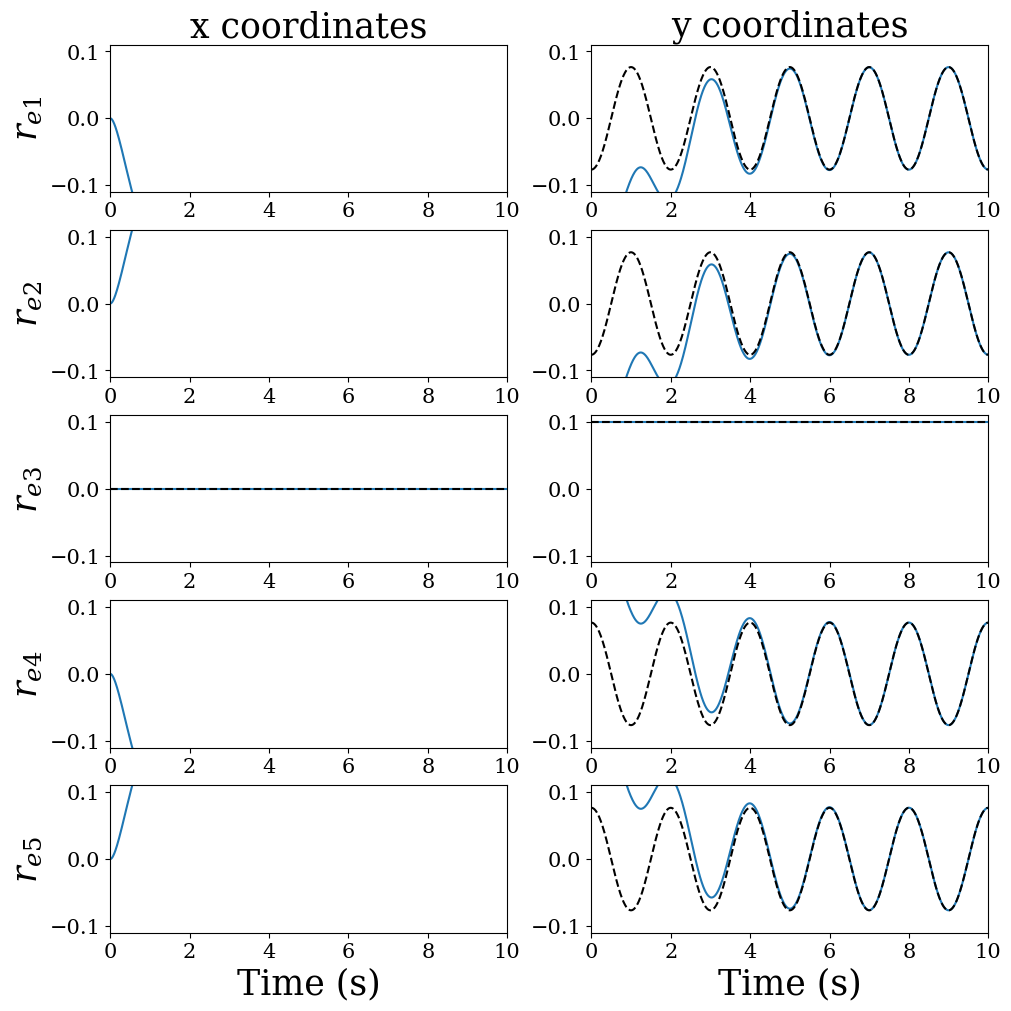

In [2]:
import numpy as np
from network_simulator_v2 import NetworkSimulatorV2

m = np.array([1,1,1,1,1,1])*0.1 #np.array([5, 1, 1, 7, 2, 2])*0.1
l = np.array([1,1,1,1,1])*0.1#np.array([2, 2, 1, 2, 2])*0.1
g = 9.81

dt = 0.01
tf = 10
t = np.arange(0, tf, dt)

# Q_0 = np.array([[0, 0], [-2, 0], [2, 0], [1, 0], [-1, 0], [3, 0]])*0.1 #+ np.array([[-0.5, 0]]*6)
# Q_0 = np.array([[0, 0], [2, 0], [2, 0], [1, 0], [3, 0], [3, 0]])*0.1
Q_0 = np.array([[0, 0], [0, -1], [0, -1], [0, 1], [0, 2], [0, 2]])*0.1 - np.array([[0, 0.3]]*6)
Q_dot_0 = np.array([[0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0]])

n = 6
k = n-1

D_of_G = np.array([[-1, -1, -1,  0,  0],
                   [ 1,  0,  0,  0,  0],
                   [ 0,  1,  0,  0,  0],
                   [ 0,  0,  1, -1, -1],
                   [ 0,  0,  0,  1,  0],
                   [ 0,  0,  0,  0,  1]])

H = np.array([[0, 1, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, 1, 1],
              [0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 1]]).T

kp = 10
kd = 10

theta_d = lambda t: np.pi/8*np.cos(np.pi*t)
theta_d_dot = lambda t: -np.pi/8*np.sin(np.pi*t)*np.pi
theta_d_ddot = lambda t: -np.pi/8*np.cos(np.pi*t)*np.pi**2
# theta_d = lambda t: np.pi/4*np.cos(np.pi*t)
# theta_d_dot = lambda t: -np.pi**2/4*np.sin(np.pi*t)
# theta_d_ddot = lambda t: -np.pi**3/4*np.cos(np.pi*t)
Qe_d = lambda t: np.array([
    l[0]*np.array([-np.cos(theta_d(t)), -np.sin(theta_d(t))]),
    l[1]*np.array([np.cos(theta_d(t)), -np.sin(theta_d(t))]),
    l[2]*np.array([0, 1]),
    l[3]*np.array([-np.cos(theta_d(t)), np.sin(theta_d(t))]),
    l[4]*np.array([np.cos(theta_d(t)), np.sin(theta_d(t))])
])
Qe_d_dot = lambda t: np.array([
    l[0]*np.array([np.sin(theta_d(t))*theta_d_dot(t), -np.cos(theta_d(t))*theta_d_dot(t)]),
    l[1]*np.array([-np.sin(theta_d(t))*theta_d_dot(t), -np.cos(theta_d(t))*theta_d_dot(t)]),
    l[2]*np.array([0, 0]),
    l[3]*np.array([np.sin(theta_d(t))*theta_d_dot(t), np.cos(theta_d(t))*theta_d_dot(t)]),
    l[4]*np.array([-np.sin(theta_d(t))*theta_d_dot(t), np.cos(theta_d(t))*theta_d_dot(t)])
])
Qe_d_ddot = lambda t: np.array([
    l[0]*np.array([np.cos(theta_d(t))*theta_d_dot(t)**2 + np.sin(theta_d(t))*theta_d_ddot(t), np.sin(theta_d(t))*theta_d_dot(t)**2 - np.cos(theta_d(t))*theta_d_ddot(t)]),
    l[1]*np.array([-np.cos(theta_d(t))*theta_d_dot(t)**2 - np.sin(theta_d(t))*theta_d_ddot(t), np.sin(theta_d(t))*theta_d_dot(t)**2 - np.cos(theta_d(t))*theta_d_ddot(t)]),
    l[2]*np.array([0, 0]),
    l[3]*np.array([np.cos(theta_d(t))*theta_d_dot(t)**2 + np.sin(theta_d(t))*theta_d_ddot(t), -np.sin(theta_d(t))*theta_d_dot(t)**2 + np.cos(theta_d(t))*theta_d_ddot(t)]),
    l[4]*np.array([-np.cos(theta_d(t))*theta_d_dot(t)**2 - np.sin(theta_d(t))*theta_d_ddot(t), -np.sin(theta_d(t))*theta_d_dot(t)**2 + np.cos(theta_d(t))*theta_d_ddot(t)])
])

f_l = lambda t: np.array([0, 0.04*np.sin(2*np.pi*t)])

sim = NetworkSimulatorV2(n, k, m, l, g, D_of_G, H, dt, tf, Q_0, Q_dot_0, f_l, Qe_d, Qe_d_dot, Qe_d_ddot, kp, kd)
sim.run()
sim.generate_plots("result1")
# sim.generate_animation("result1", ((-0.4, 0.4), (-0.4, 0.4)))